# Lede Program Project 1

This notebook documents the process and results of my individual project for the Lede Program.

The main objectives of this project are as follows:

- Analyze trends in the number of elementary school students taking private junior high school entrance exams in Japan.  
- Compile a ranking of high schools based on the number of students admitted to the University of Tokyo.  
- Examine educational expenses by income level using data from the Family Income and Expenditure Survey.  

Throughout this notebook, I describe the data sources and methods used for each objective, and present key findings and insights.  
The goal is to provide a clear and reproducible workflow, making it easy for others to understand and build upon this work.

# ElementarySchool Graduates and JuniorHighSchool Applicants

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('/Users/yuta-uebayashi/Desktop/Lede課題一覧/Lede個人プロジェクト/ElementarySchool_Graduates_and_JuniorHighSchool_Applicants.csv')

In [47]:
df.head(5)

,year,guradate(men),graduate(women),total,number of examinees
0,2000,"158,075","150,288","308,363","40,100"
1,2001,"156,206","149,536","305,742","41,500"
2,2002,"148,953","141,607","290,560","40,400"
3,2003,"147,199","140,848","288,047","42,500"
4,2004,"150,564","142,655","293,219","44,500"


In [48]:
df[df['number of examinees'].isna()]

,year,guradate(men),graduate(women),total,number of examinees
26,※The survey targets:Tokyo metropolitan area\n※...,NaN,NaN,NaN,NaN


In [49]:
df = df.dropna(subset=['number of examinees'])  
df['number of examinees'] = df['number of examinees'].str.replace(',', '').astype(int)

In [50]:
df.dtypes

year                   object
guradate(men)          object
graduate(women)        object
total                  object
number of examinees     int64
dtype: object

In [51]:
df['guradate(men)'] = df['guradate(men)'].str.replace(',', '')
df['graduate(women)'] = df['graduate(women)'].str.replace(',', '')
df['total'] = df['total'].str.replace(',', '')

In [52]:
df['guradate(men)'] = df['guradate(men)'].astype(int)
df['graduate(women)'] = df['graduate(women)'].astype(int)
df['total'] = df['total'].astype(int)

In [53]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [54]:
df.dtypes

year                   datetime64[ns]
guradate(men)                   int64
graduate(women)                 int64
total                           int64
number of examinees             int64
dtype: object

In [55]:
df['examinee_rate_percent'] = (df['number of examinees'] / df['total'] * 100).round(2)

In [56]:
df.head(5)

,year,guradate(men),graduate(women),total,number of examinees,examinee_rate_percent
0,2000-01-01,158075,150288,308363,40100,13.00
1,2001-01-01,156206,149536,305742,41500,13.57
2,2002-01-01,148953,141607,290560,40400,13.90
3,2003-01-01,147199,140848,288047,42500,14.75
4,2004-01-01,150564,142655,293219,44500,15.18


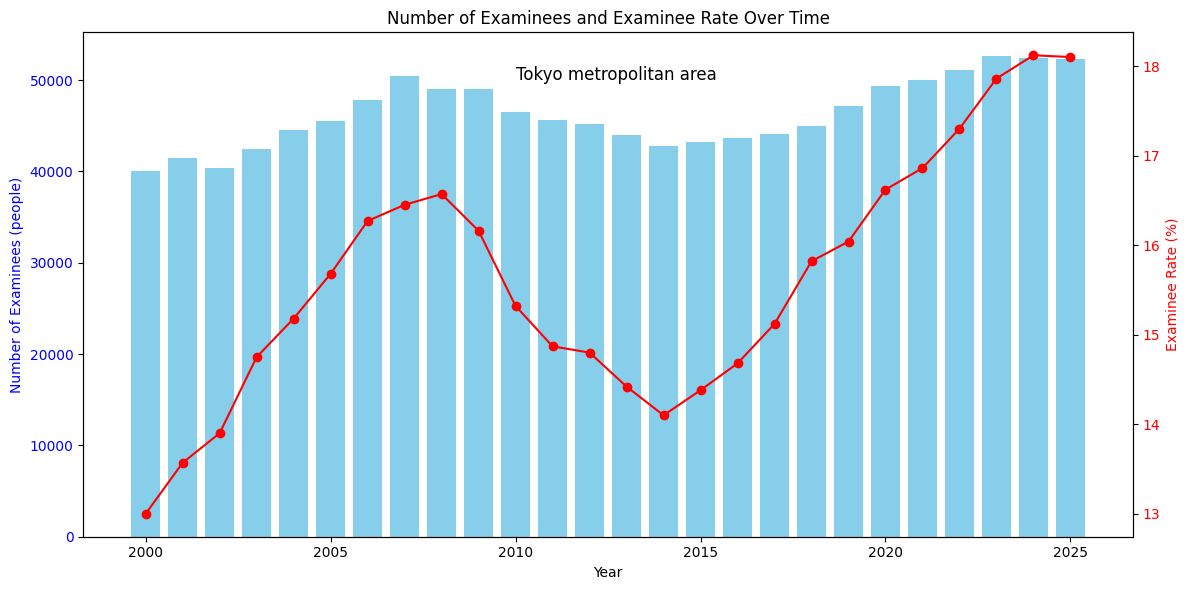

In [57]:
years = df['year'].dt.year

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(years, df['number of examinees'], color='skyblue', label='Number of Examinees')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Examinees (people)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(years, df['examinee_rate_percent'], color='red', marker='o', label='Examinee Rate (%)')
ax2.set_ylabel('Examinee Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.text(2010, 50000, 'Tokyo metropolitan area', fontsize=12, color='black')

plt.title('Number of Examinees and Examinee Rate Over Time')
plt.xticks(rotation=45)
fig.tight_layout()

## High School Rankings by Number of Students Accepted to the University of Tokyo

In [58]:
import pandas as pd
import json

# 東大合格ランキング：基データは大学通信オンライン（URL:https://univ-online.com/success/tokyo/u126/）
df = pd.read_csv("/Users/yuta-uebayashi/Desktop/Lede課題一覧/Lede個人プロジェクト/HighSchool_Ranking.csv")

# ランキング上位の高校の立地をGeoJSONで読み込み
with open("/Users/yuta-uebayashi/Desktop/Lede課題一覧/Lede個人プロジェクト/schools.geojson") as f:
    geo = json.load(f)

# GeoJSONの緯度経度を辞書化
coord_map = {}
for feature in geo["features"]:
    props = feature.get("properties", {})
    name = props.get("name")
    if not name:
        continue
    lon, lat = feature["geometry"]["coordinates"]
    coord_map[name] = {"lat": lat, "lon": lon}

# 緯度経度をマージ
df["lat"] = df["name"].map(lambda x: coord_map.get(x, {}).get("lat"))
df["lon"] = df["name"].map(lambda x: coord_map.get(x, {}).get("lon"))

In [59]:
df

,public or private,name,Prefecture,Address,Number of successful applicants(fiscal year 2025),lat,lon
0,private,Kaisei,Tokyo,"4-2-4 Nishi-Nippori, Arakawa-ku, Tokyo 116-0013",149,35.732317,139.765342
1,public,Komaba,Tokyo,"4-7-1 Ikejiri, Setagaya-ku, Tokyo 154-0001",117,35.654955,139.680714
2,private,Seiko Gakuin,Kanagawa,"100 Takinoue, Naka-ku, Yokohama-shi, Kanagawa ...",95,35.423194,139.642886
3,private,Azabu,Tokyo,"2-3-29 Motoazabu, Minato-ku, Tokyo 106-0046",82,35.654406,139.727964
4,public,Tokyo Metropolitan Hibiya High School,Tokyo,"2-16-1 Nagata-cho, Chiyoda-ku, Tokyo 100-0014",81,35.676250,139.739747
5,private,Nada,Hyogo,"8-5-1 Uozaki Kitamachi, Higashinada-ku, Kobe-s...",77,34.719228,135.268533
6,private,Shibuya Education Academy Makuhari,Chiba,"1-3 Wakaba, Mihama-ku, Chiba-shi, Chiba 261-0014",75,35.647825,140.053099
7,public,Yokohama-Suiran Senior High School,Kanagawa,"1-1 Mitsuzawa Minamimachi, Kanagawa-ku, Yokoha...",74,35.472602,139.610042
8,private,Eiko Gakuen,Kanagawa,"4-1-1 Tamanawa, Kamakura City, Kanagawa Prefec...",55,35.355916,139.519941
9,private,Oin Junior and Senior High School,Tokyo,"1-5-25 Hongo, Bunkyo-ku, Tokyo 113-0033",52,35.703810,139.756491


In [60]:
# Datawrapper用CSVとして保存
df[["name", "lat", "lon", "Number of successful applicants(fiscal year 2025)"]].to_csv("datawrapper_map.csv", index=False)

## Household Survey

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
#家計調査データから抜粋
df = pd.read_csv('/Users/yuta-uebayashi/Desktop/Lede課題一覧/Lede個人プロジェクト/Household_Survey_2023.csv')

In [92]:
df.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,項 目,NaN,NaN,NaN,年間収入五分位階級,NaN,NaN,Yearly income quintile group,NaN
3,NaN,NaN,NaN,平 均,Ⅰ,Ⅱ,Ⅲ,Ⅳ,Ⅴ
4,NaN,教育,NaN,"16,838","6,052","10,202","15,119","21,723","31,096"
5,NaN,NaN,授業料等,"12,599","4,968","8,155","11,457","15,966","22,450"
6,NaN,NaN,教科書・学習参考教材,325,118,242,345,402,517
7,NaN,NaN,補習教育,"3,914",965,"1,804","3,317","5,355","8,129"
8,年間収入(万円),NaN,NaN,756,385,566,699,862,"1,270"


In [93]:
#3行目をカラムに指定、4行目以降をデータ本体として切り出し
df.columns = df.iloc[3]
df = df.iloc[4:].reset_index(drop=True)

In [94]:
df

3,NaN,NaN,NaN,平 均,Ⅰ,Ⅱ,Ⅲ,Ⅳ,Ⅴ
0,NaN,教育,NaN,"16,838","6,052","10,202","15,119","21,723","31,096"
1,NaN,NaN,授業料等,"12,599","4,968","8,155","11,457","15,966","22,450"
2,NaN,NaN,教科書・学習参考教材,325,118,242,345,402,517
3,NaN,NaN,補習教育,"3,914",965,"1,804","3,317","5,355","8,129"
4,年間収入(万円),NaN,NaN,756,385,566,699,862,"1,270"


In [95]:
#NaNのある列名を確認
print(df.columns.tolist())

[nan, nan, nan, '平\u3000均', 'Ⅰ', 'Ⅱ', 'Ⅲ', 'Ⅳ', 'Ⅴ']


In [96]:
df.columns = ["-", "-", "-", "Average", "Income Level1", "Income Level2", "Income Level3", 'Income Level4', "Income Level5"]
df

,-,-,-,Average,Income Level1,Income Level2,Income Level3,Income Level4,Income Level5
0,NaN,教育,NaN,"16,838","6,052","10,202","15,119","21,723","31,096"
1,NaN,NaN,授業料等,"12,599","4,968","8,155","11,457","15,966","22,450"
2,NaN,NaN,教科書・学習参考教材,325,118,242,345,402,517
3,NaN,NaN,補習教育,"3,914",965,"1,804","3,317","5,355","8,129"
4,年間収入(万円),NaN,NaN,756,385,566,699,862,"1,270"


In [98]:
#日本語を英語に変換
df.iloc[0, 1] = "Education"
df.iloc[1, 2] = "Tuition and Other Fees"
df.iloc[2, 2] = "Textbooks and Study Materials"
df.iloc[3, 2] = "Supplementary Education"
df.iloc[4, 0] = "Annual Income (10,000 yen)"
df

,-,-,-,Average,Income Level1,Income Level2,Income Level3,Income Level4,Income Level5
0,NaN,Education,NaN,"16,838","6,052","10,202","15,119","21,723","31,096"
1,NaN,NaN,Tuition and Other Fees,"12,599","4,968","8,155","11,457","15,966","22,450"
2,NaN,NaN,Textbooks and Study Materials,325,118,242,345,402,517
3,NaN,NaN,Supplementary Education,"3,914",965,"1,804","3,317","5,355","8,129"
4,"Annual Income (10,000 yen)",NaN,NaN,756,385,566,699,862,"1,270"


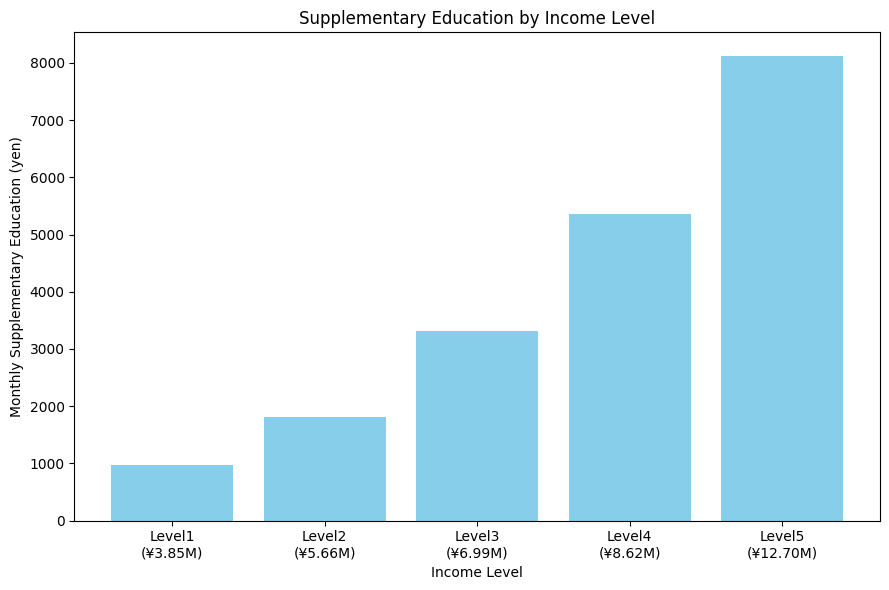

In [107]:
import matplotlib.pyplot as plt

# 年収カテゴリと実際の金額（万円）
income_levels = ['Level1\n(¥3.85M)', 'Level2\n(¥5.66M)', 'Level3\n(¥6.99M)', 'Level4\n(¥8.62M)', 'Level5\n(¥12.70M)']

# 元のデータ列名に対応するキー
income_level_keys = ['Income Level1', 'Income Level2', 'Income Level3', 'Income Level4', 'Income Level5']

# 補習教育費のデータ取得・変換
supplementary_education = df.loc[3, income_level_keys]
supplementary_education = supplementary_education.replace(',', '', regex=True).astype(float)

# グラフ作成
plt.figure(figsize=(9, 6))
plt.bar(income_levels, supplementary_education, color='skyblue')
plt.xlabel("Income Level")
plt.ylabel("Monthly Supplementary Education (yen)")
plt.title("Supplementary Education by Income Level")
plt.tight_layout()